## EDA of the clean PERSIANN

In [1]:
# data wrangling
import pandas as pd
import numpy as np

# image processing
from PIL import Image
import matplotlib.pyplot as plt

# geo data processing
from osgeo import gdal
from osgeo import osr

import georasters as gr
import geopandas as gpd

# utils
import glob
import os
from struct import unpack # binary data

/home/adriel-martins/.cache/pypoetry/virtualenvs/wm-tAk-yGEW-py3.8/lib/python3.8/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


<AxesSubplot:>

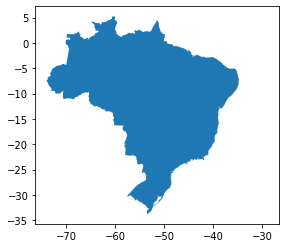

In [2]:
gadm = gpd.read_file(
    '../data/gadm/gadm36_BRA_1.shp'
).dissolve(
    by='NAME_0'
).drop(
    columns=[
        'GID_0', 'GID_1', 'NAME_1',
        'VARNAME_1', 'NL_NAME_1', 'TYPE_1',
        'ENGTYPE_1', 'CC_1', 'HASC_1'
    ]
)
gadm.plot()

In [3]:
data = gr.from_file('../data/PERSIANN_1d20211228.tif')
geodata = data.to_geopandas().rename(
    columns={
        'x':'lon',
        'y':'lat'
    }
).drop(
    columns=['row', 'col']
).set_crs(
    gadm.crs,
    inplace=True, allow_override=True
)

geodata

,value,lon,lat,geometry
0,2.67,-180.00,59.50,"POLYGON ((-180.00000 59.50000, -179.75000 59.5..."
1,2.86,-179.75,59.50,"POLYGON ((-179.75000 59.50000, -179.50000 59.5..."
2,1.51,-179.50,59.50,"POLYGON ((-179.50000 59.50000, -179.25000 59.5..."
3,1.12,-179.25,59.50,"POLYGON ((-179.25000 59.50000, -179.00000 59.5..."
4,0.64,-179.00,59.50,"POLYGON ((-179.00000 59.50000, -178.75000 59.5..."
...,...,...,...,...
685435,0.00,178.75,-59.25,"POLYGON ((178.75000 -59.25000, 179.00000 -59.2..."
685436,0.00,179.00,-59.25,"POLYGON ((179.00000 -59.25000, 179.25000 -59.2..."
685437,0.00,179.25,-59.25,"POLYGON ((179.25000 -59.25000, 179.50000 -59.2..."
685438,0.00,179.50,-59.25,"POLYGON ((179.50000 -59.25000, 179.75000 -59.2..."


In [4]:
lon_array = np.arange(-69, -36, .25).tolist()
lat_array = np.arange(-35, 6, .25).tolist()
target_geodata = geodata.query(
    'lon in @lon_array & lat in @lat_array & value > 0'
)
target_geodata

,value,lon,lat,geometry
310073,1.18,-61.75,5.75,"POLYGON ((-61.75000 5.75000, -61.50000 5.75000..."
310074,0.80,-61.50,5.75,"POLYGON ((-61.50000 5.75000, -61.25000 5.75000..."
310076,1.59,-61.00,5.75,"POLYGON ((-61.00000 5.75000, -60.75000 5.75000..."
310077,0.75,-60.75,5.75,"POLYGON ((-60.75000 5.75000, -60.50000 5.75000..."
310078,0.57,-60.50,5.75,"POLYGON ((-60.50000 5.75000, -60.25000 5.75000..."
...,...,...,...,...
544891,2.74,-37.25,-35.00,"POLYGON ((-37.25000 -35.00000, -37.00000 -35.0..."
544892,5.16,-37.00,-35.00,"POLYGON ((-37.00000 -35.00000, -36.75000 -35.0..."
544893,7.46,-36.75,-35.00,"POLYGON ((-36.75000 -35.00000, -36.50000 -35.0..."
544894,3.97,-36.50,-35.00,"POLYGON ((-36.50000 -35.00000, -36.25000 -35.0..."


In [5]:
geodata.mean()

value    1.888713
lon     -0.125000
lat      0.125000
dtype: float64

In [6]:
target_geodata.mean()

value     6.736198
lon     -52.841897
lat     -13.328063
dtype: float64

<AxesSubplot:>

<Figure size 1152x2304 with 0 Axes>

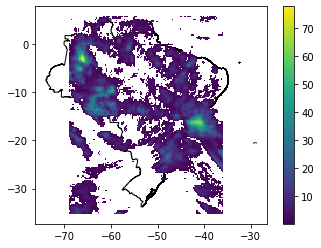

In [8]:
plt.figure(figsize=(16, 32))
ax = gadm.plot(color='white', edgecolor='black')

target_geodata.plot(ax=ax, column='value', legend=True, markersize=3)